In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra

In [2]:
from sklearn.linear_model import LinearRegression #importing lin reg
from sklearn.model_selection import train_test_split #splitting data into test and train
from sklearn.metrics import accuracy_score #calculating accuracy

import matplotlib.pyplot as plt #graphing data

In [22]:
data = pd.read_csv("Breast_Cancer.csv") 
data.drop("Status", axis=1, inplace=True)
data.drop("Marital Status", axis=1, inplace=True)
data.duplicated().value_counts()
data = data.drop_duplicates()
data

,Age,Race,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,White,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60
1,50,White,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62
2,58,White,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75
3,58,White,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84
4,47,White,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49
4020,56,White,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69
4021,68,White,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69
4022,58,Black,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
dfle = data
dfle['Race'] = le.fit_transform(dfle['Race'])
dfle['T Stage '] = le.fit_transform(dfle['T Stage '])
dfle['N Stage'] = le.fit_transform(dfle['N Stage'])
dfle['6th Stage'] = le.fit_transform(dfle['6th Stage'])
dfle['differentiate'] = le.fit_transform(dfle['differentiate'])
dfle['Grade'] = le.fit_transform(dfle['Grade'])
dfle['A Stage'] = le.fit_transform(dfle['A Stage'])
dfle['Tumor Size'] = le.fit_transform(dfle['Tumor Size'])
dfle['Estrogen Status'] = le.fit_transform(dfle['Estrogen Status'])
dfle['Progesterone Status'] = le.fit_transform(dfle['Progesterone Status'])
dfle

,Age,Race,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,2,0,0,0,1,3,1,3,1,1,24,1,60
1,50,2,1,1,2,0,2,1,34,1,1,14,5,62
2,58,2,2,2,4,0,2,1,62,1,1,14,7,75
3,58,2,0,0,0,1,3,1,17,1,1,2,1,84
4,47,2,1,0,1,1,3,1,40,1,1,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,0,0,0,0,2,1,8,1,1,1,1,49
4020,56,2,1,1,2,0,2,1,45,1,1,14,8,69
4021,68,2,1,0,1,0,2,1,21,1,0,11,3,69
4022,58,0,1,0,1,0,2,1,43,1,1,11,1,72


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()

In [71]:
x = dfle.drop("Survival Months", axis=1)
y = dfle["Survival Months"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(x_test, y_test)

predictions = model.predict(x_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mse

500.0196595828555

In [72]:
z_scores = (x_train - x_train.mean()) / x_train.std()

# Define the outlier threshold
outlier_threshold = 3

# Filter outliers from the training data
x_train_clean = x_train[(np.abs(z_scores) < outlier_threshold).all(axis=1)]
y_train_clean = y_train[(np.abs(z_scores) < outlier_threshold).all(axis=1)]

# Initialize and fit the model
model = LinearRegression()
model.fit(x_train_clean, y_train_clean)

# Make predictions on the test set
predictions = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae

19.02486451251224

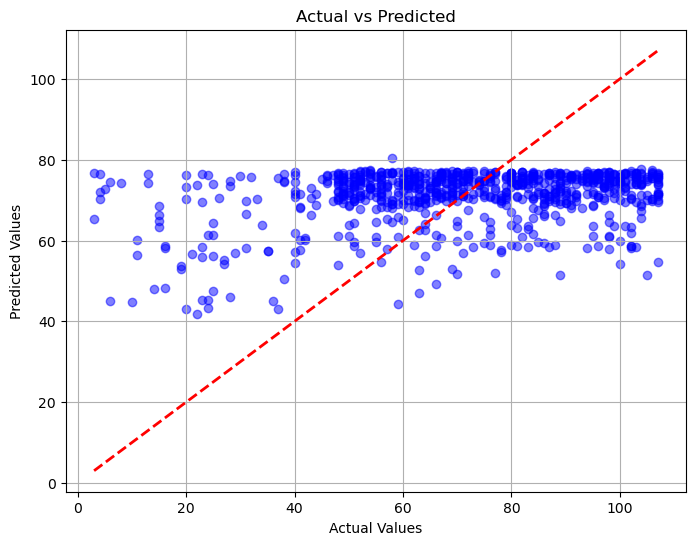

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.show()


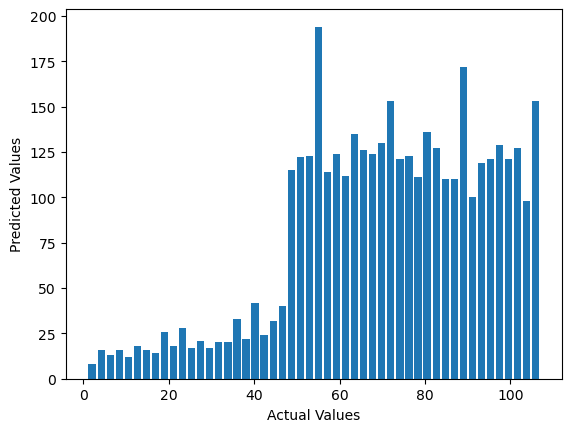

In [69]:
plt.hist(dfle['Survival Months'], bins=50, rwidth=0.8)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [57]:
dfle['Survival Months'].std()

22.92300940943985